In [15]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from collections import Counter
import mne

## The Temple University Hospital Abnormal EEG Corpus

In [16]:
# path = "./tuh_eeg_abnormal/v3.0.1/edf/eval/abnormal/01_tcp_ar/"
# files = [file_name for file_name in os.listdir(path) if file_name.split('.')[-1] == 'edf']

In [17]:
abnormal_train_path = "../datasets/tuab/tuh_eeg_abnormal/v3.0.1/edf/train/abnormal/01_tcp_ar/"
abnormal_eval_path = "../datasets/tuab/tuh_eeg_abnormal/v3.0.1/edf/eval/abnormal/01_tcp_ar/"
normal_train_path = "../datasets/tuab/tuh_eeg_abnormal/v3.0.1/edf/train/normal/01_tcp_ar/"
normal_eval_path = "../datasets/tuab/tuh_eeg_abnormal/v3.0.1/edf/eval/normal/01_tcp_ar/"

abnormal_train = [abnormal_train_path + file_name for file_name in os.listdir(abnormal_train_path) if file_name.split('.')[-1] == 'edf']
abnormal_eval = [abnormal_eval_path + file_name for file_name in os.listdir(abnormal_eval_path) if file_name.split('.')[-1] == 'edf']
normal_train = [normal_train_path + file_name for file_name in os.listdir(normal_train_path) if file_name.split('.')[-1] == 'edf']
normal_eval = [normal_eval_path + file_name for file_name in os.listdir(normal_eval_path) if file_name.split('.')[-1] == 'edf']
files_paths = abnormal_train + abnormal_eval + normal_train + normal_eval

### Анализ данных

In [18]:
# Кол-во данных 

print("Abnormal train:", len(abnormal_train))
print("Abnormal eval:", len(abnormal_eval))
print("Abnormal total:", len(abnormal_train) + len(abnormal_eval))
print()
print("Normal train:", len(normal_train))
print("Normal eval:", len(normal_eval))
print("Normal total:", len(normal_train) + len(normal_eval))

Abnormal train: 1346
Abnormal eval: 126
Abnormal total: 1472

Normal train: 1371
Normal eval: 150
Normal total: 1521


In [19]:
# # Проверка размеров файлов

# data_sizes = []
# for files_path in files_paths:
#     data_size = os.path.getsize(files_path) / (1024 * 1024)
#     data_sizes.append(data_size)

# print("Минимальный размер: ", min(data_sizes))
# print("Максимальный размер: ", max(data_sizes))


# plt.hist(data_sizes, bins=[0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
#                            22, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 
#                            100, 120, 150, 200, 250, 270])
# plt.show()

In [20]:
# Подсчет статистик

data = []
nchans = []
sfreqs = []
time_points = []
channels = {}

for files_path in files_paths:
    data_i = mne.io.read_raw_edf(files_path, verbose=False)
    data.append(data_i)
    nchans.append(data_i.info["nchan"])
    sfreqs.append(data_i.info["sfreq"])
    time_points.append(data_i.get_data().shape[1])
    
    for ch_name in data_i.info.ch_names:
        if ch_name not in channels.keys():
            channels[ch_name] = 1
        else:
            channels[ch_name] += 1

In [21]:
# Кол-во каналов
df = pd.DataFrame({'channels': nchans})
fig = px.pie(df, names='channels', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [22]:
# Частота дискретизации
df = pd.DataFrame({'sfreq': sfreqs})
fig = px.pie(df, names='sfreq', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

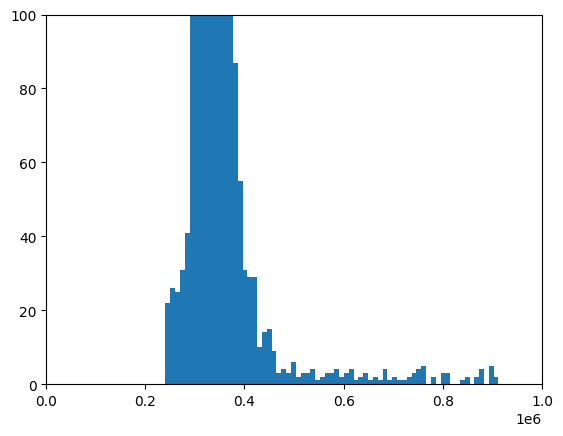

In [23]:
# Продолжительность измерений
plt.hist(time_points, bins=500)
plt.xlim((0, 1000000))
plt.ylim((0, 100))
plt.show()

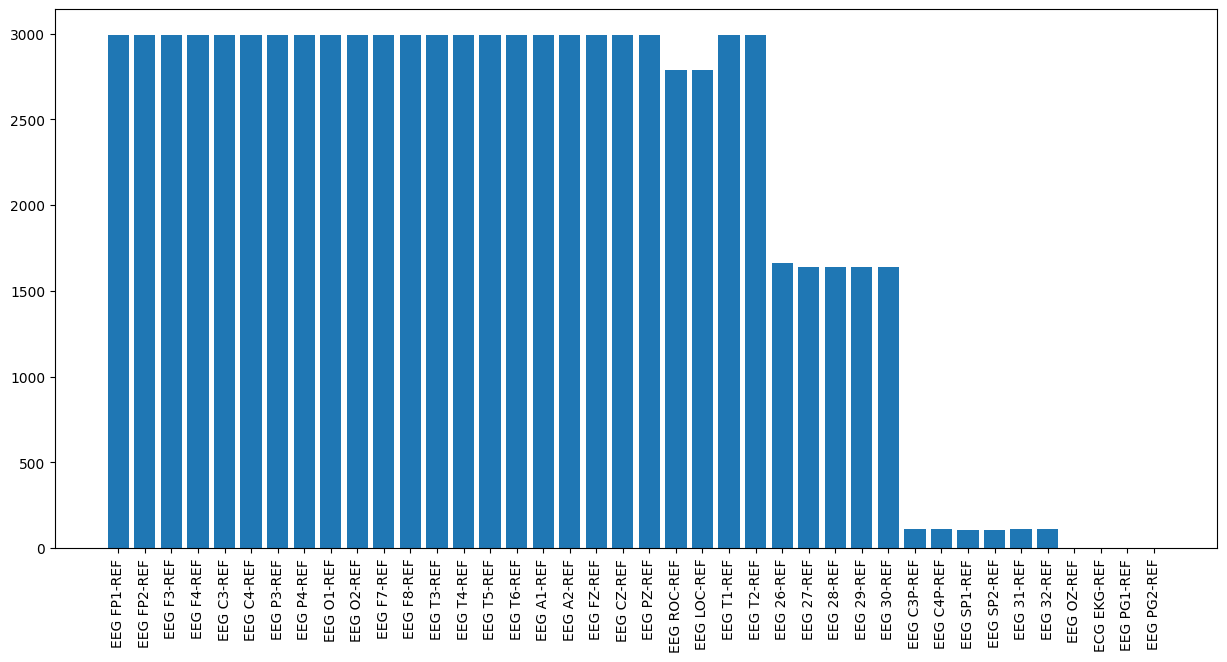

In [34]:
channels.pop('PULSE RATE')
channels.pop('EMG-REF')
channels.pop('SUPPR')
channels.pop('BURSTS')
channels.pop('IBI')
channels.pop('PHOTIC-REF')
channels.pop('EEG EKG1-REF')

fig = plt.figure(figsize=(15, 7))
plt.bar(channels.keys(), channels.values());
plt.xticks(rotation=90);
plt.show()

top_channels = []

for key, value in channels.items():
    if value > 2800:
        top_channels.append(key)

with open('top_chans.txt', 'w') as f:
    for line in top_channels:
        f.write(f"{line}\n")

In [37]:
top_channels

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG T1-REF',
 'EEG T2-REF']

In [38]:
len(top_channels)

23

In [39]:
with open('top_chans.txt', 'w') as f:
    for line in top_channels:
        f.write(f"{line}\n")

## EEG-Based Visual Classification Dataset

In [15]:
# Define options
import argparse
parser = argparse.ArgumentParser(description="Template")
# Dataset options

#Data - Data needs to be pre-filtered and filtered data is available

### BLOCK DESIGN ###
#Data
#parser.add_argument('-ed', '--eeg-dataset', default=r"data\block\eeg_55_95_std.pth", help="EEG dataset path") #55-95Hz
parser.add_argument('-ed', '--eeg-dataset', default="./datasets/eeg_cvpr_2017/data/eeg_5_95_std.pth", help="EEG dataset path") #5-95Hz
#parser.add_argument('-ed', '--eeg-dataset', default=r"data\block\eeg_14_70_std.pth", help="EEG dataset path") #14-70Hz
#Splits
parser.add_argument('-sp', '--splits-path', default="./datasets/eeg_cvpr_2017/data/block_splits_by_image_all.pth", help="splits path") #All subjects
#parser.add_argument('-sp', '--splits-path', default=r"data\block\block_splits_by_image_single.pth", help="splits path") #Single subject
### BLOCK DESIGN ###

parser.add_argument('-sn', '--split-num', default=0, type=int, help="split number") #leave this always to zero.

#Subject selecting
parser.add_argument('-sub','--subject', default=0   , type=int, help="choose a subject from 1 to 6, default is 0 (all subjects)")

#Time options: select from 20 to 460 samples from EEG data
parser.add_argument('-tl', '--time_low', default=20, type=float, help="lowest time value")
parser.add_argument('-th', '--time_high', default=460,  type=float, help="highest time value")

# Model type/options
parser.add_argument('-mt','--model_type', default='lstm', help='specify which generator should be used: lstm|EEGChannelNet')
# It is possible to test out multiple deep classifiers:
# - lstm is the model described in the paper "Deep Learning Human Mind for Automated Visual Classification”, in CVPR 2017
# - model10 is the model described in the paper "Decoding brain representations by multimodal learning of neural activity and visual features", TPAMI 2020
parser.add_argument('-mp','--model_params', default='', nargs='*', help='list of key=value pairs of model options')
parser.add_argument('--pretrained_net', default='', help="path to pre-trained net (to continue training)")

# Training options
parser.add_argument("-b", "--batch_size", default=16, type=int, help="batch size")
parser.add_argument('-o', '--optim', default="Adam", help="optimizer")
parser.add_argument('-lr', '--learning-rate', default=0.001, type=float, help="learning rate")
parser.add_argument('-lrdb', '--learning-rate-decay-by', default=0.5, type=float, help="learning rate decay factor")
parser.add_argument('-lrde', '--learning-rate-decay-every', default=10, type=int, help="learning rate decay period")
parser.add_argument('-dw', '--data-workers', default=4, type=int, help="data loading workers")
parser.add_argument('-e', '--epochs', default=200, type=int, help="training epochs")

# Save options
parser.add_argument('-sc', '--saveCheck', default=100, type=int, help="learning rate")

# Backend options
parser.add_argument('--no-cuda', default=False, help="disable CUDA", action="store_true")

# Parse arguments
# opt = parser.parse_args()
opt, unknown = parser.parse_known_args()
print(opt)

Namespace(eeg_dataset='./datasets/eeg_cvpr_2017/data/eeg_5_95_std.pth', splits_path='./datasets/eeg_cvpr_2017/data/block_splits_by_image_all.pth', split_num=0, subject=0, time_low=20, time_high=460, model_type='lstm', model_params='', pretrained_net='', batch_size=16, optim='Adam', learning_rate=0.001, learning_rate_decay_by=0.5, learning_rate_decay_every=10, data_workers=4, epochs=200, saveCheck=100, no_cuda=False)


In [16]:
import torch

# Dataset class
class EEGDataset:
    
    # Constructor
    def __init__(self, eeg_signals_path):
        # Load EEG signals
        loaded = torch.load(eeg_signals_path)
        if opt.subject!=0:
            self.data = [loaded['dataset'][i] for i in range(len(loaded['dataset']) ) if loaded['dataset'][i]['subject']==opt.subject]
        else:
            self.data=loaded['dataset']        
        self.labels = loaded["labels"]
        self.images = loaded["images"]
        
        # Compute size
        self.size = len(self.data)

    # Get size
    def __len__(self):
        return self.size

    # Get item
    def __getitem__(self, i):
        # Process EEG
        eeg = self.data[i]["eeg"].float().t()
        eeg = eeg[opt.time_low:opt.time_high,:]

        if opt.model_type == "model10":
            eeg = eeg.t()
            eeg = eeg.view(1,128,opt.time_high-opt.time_low)
        # Get label
        label = self.data[i]["label"]
        # Return
        return eeg, label

In [17]:
# Load dataset
dataset = EEGDataset(opt.eeg_dataset)

C:\Users\kshch\AppData\Local\Temp\ipykernel_27164\524457308.py:9: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [18]:
dataset.size

11965

In [19]:
dataset.data[1]['eeg'].shape

torch.Size([128, 511])

In [20]:
loaded = torch.load(opt.eeg_dataset)

C:\Users\kshch\AppData\Local\Temp\ipykernel_27164\2942136314.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [21]:
loaded['dataset']

[{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
          [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
          [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
          ...,
          [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
          [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
          [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
  'image': 0,
  'label': 10,
  'subject': 4},
 {'eeg': tensor([[-0.0120,  0.0473,  0.1264,  ...,  0.0109,  0.0188,  0.0211],
          [-0.0061,  0.0061,  0.0379,  ...,  0.0466,  0.0355,  0.0135],
          [ 0.0016,  0.0690,  0.1212,  ...,  0.0077, -0.0025,  0.0047],
          ...,
          [ 0.0189,  0.0461,  0.0376,  ..., -0.0657, -0.0639, -0.0245],
          [-0.0043,  0.0026,  0.0072,  ..., -0.0171, -0.0132, -0.0064],
          [ 0.0073,  0.1099,  0.1803,  ..., -0.1500, -0.1019, -0.0184]]),
  'image': 1,
  'label': 30,
  'subject': 

In [24]:
path = './datasets/eeg_cvpr_2017/data/block_splits_by_image_all.pth'
loaded = torch.load(path)

C:\Users\kshch\AppData\Local\Temp\ipykernel_27164\3840917511.py:2: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



In [25]:
len(loaded['splits'])

6